In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load your data into a pandas DataFrame
# Assuming your DataFrame is named 'df' and contains features and continuous target variable

# Example data (replace this with your actual data loading code)

df = pd.read_excel('pearl_millet_produce.xlsx')
print(df.head())
df=df.dropna()
# Define features and target variable
X, y = df.drop('PEARL MILLET YIELD ', axis=1), df[['PEARL MILLET YIELD ']]
print(X.head())

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression



   PEARL MILLET AREA (1000 ha)    Year precipitaion(cm)  IRRIGATION(Mha)  \
0                      8860.70  1966.0              103            28.00   
1                      9992.38  1967.0            111.5            29.25   
2                      9312.97  1968.0            101.9            30.50   
3                      8980.01  1969.0            109.2            31.75   
4                      8084.65  1970.0            125.3            33.00   

   MECHANISATION COEF.  AGRICULTURE BUDGET  Pearl Millet yield last year  \
0                 2.97              2254.0                      12126.50   
1                 4.00              2366.0                      12467.38   
2                 5.03              2582.0                      12752.54   
3                 6.06              3052.0                      12323.49   
4                 7.09              3455.0                      12510.80   

   PEARL MILLET YIELD   
0             12467.38  
1             12752.54  
2          

Mean Squared Error: 351422.3710835976
R-squared Score: 0.8658946409166014
year original predicted based on previous data
1966 12467.38     [12586.79575655]
1967 12752.54     [12622.88519321]
1968 12323.49     [12300.15558928]
1969 12510.8     [12502.13275864]
1970 13268.95     [12898.03430523]
1971 11861.45     [12428.65428779]
1972 12301.33     [11824.24045182]
1973 14083.14     [12384.41749524]
1974 11450.56     [11459.25564006]
1975 11467.52     [12393.99611601]
1976 10750.21     [11762.09788892]
1977 10973.87     [12000.14775137]
1978 11310.55     [11852.68138786]
1979 11215.13     [11308.08607651]
1980 11670.05     [11249.66536154]
1981 11702.78     [11288.71412792]
1982 10894.25     [10668.06413472]
1983 11763.36     [11266.99453639]
1984 10629.3     [10629.94645027]
1985 10654.34     [10817.14652772]
1986 11231.32     [10724.63626819]
1987 8801.8     [10236.04524594]
1988 11877.9     [11314.22288362]
1989 11010.05     [10069.07889252]
1990 10713.28     [10732.58554022]
1991 1024

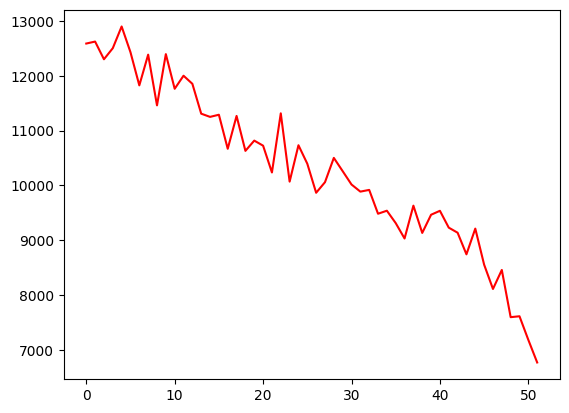

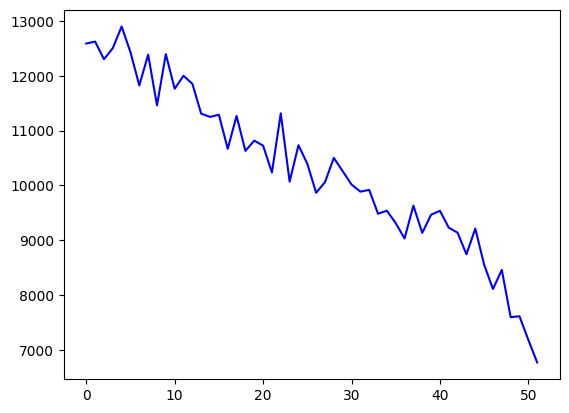

In [6]:
degree = 1  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X)
X_test_poly = poly_features.transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

list_given=y['PEARL MILLET YIELD ']
avg=0
print('year' , 'original' , 'predicted based on previous data')
for el in range(len(list_given)):
    print(1966+el,list_given[el], "   ", y_pred[el])
    avg+=(list_given[el]-y_pred[el])**2
print((avg/51)**(1/2))

plt.plot(y_pred,color='red')
plt.show()
plt.plot(y_pred,color='blue')
plt.show()
